<a href="https://colab.research.google.com/github/joaovictordds/financas/blob/main/forca_da_tendencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação das libs

In [1]:
!pip install yfinance -q

     |████████████████████████████████| 6.3 MB 9.3 MB/s 


In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

### Seleção do papel

In [3]:
ticker = 'BBAS3.SA'
acao = yf.download(ticker, start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


### Calculo do TrueRange

In [4]:
def get_ci(high, low, close, lookback):
    tr1 = pd.DataFrame(high - low).rename(columns = {0:'tr1'})
    tr2 = pd.DataFrame(abs(high - close.shift(1))).rename(columns = {0:'tr2'})
    tr3 = pd.DataFrame(abs(low - close.shift(1))).rename(columns = {0:'tr3'})
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').dropna().max(axis = 1)
    atr = tr.rolling(1).mean()
    highh = high.rolling(lookback).max()
    lowl = low.rolling(lookback).min()
    ci = 100 * np.log10((atr.rolling(lookback).sum()) / (highh - lowl)) / np.log10(lookback)
    return ci

In [5]:
acao['ci_14'] = get_ci(acao['High'], acao['Low'], acao['Close'], 14)
acao = acao.dropna()

### Gráfico da ação e do Indicador abaixo

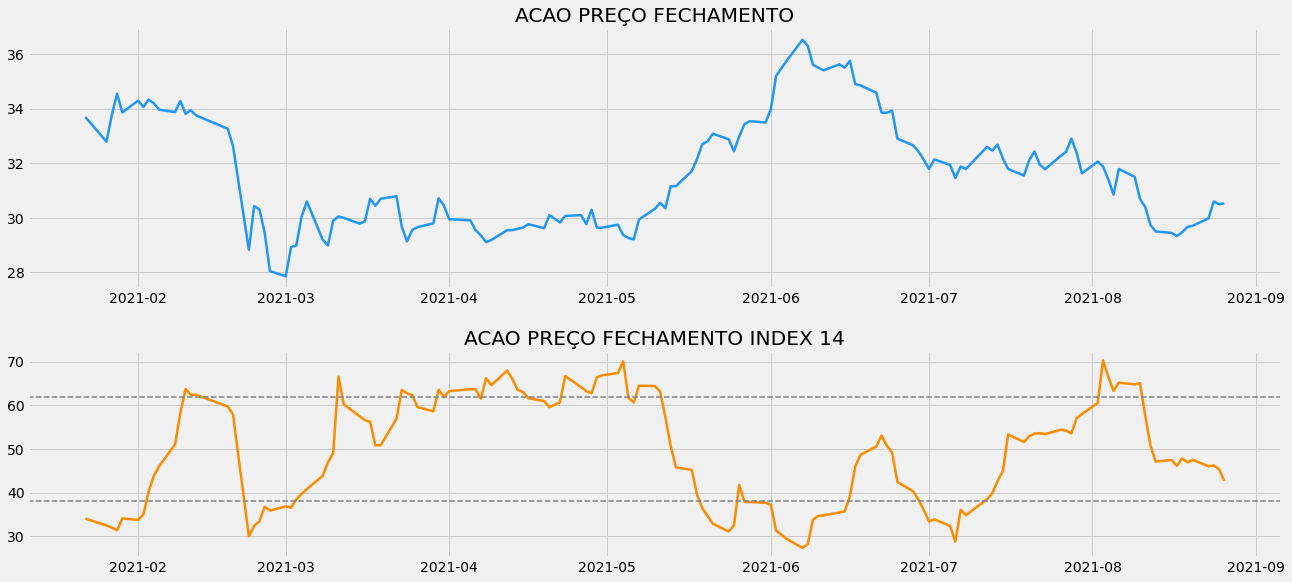

In [6]:
ax1 = plt.subplot2grid((11,1,), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1,), (6,0), rowspan = 4, colspan = 1)
ax1.plot(acao['Close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('ACAO PREÇO FECHAMENTO')
ax2.plot(acao['ci_14'], linewidth = 2.5, color = '#fb8c00')
ax2.axhline(38.2, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(61.8, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('ACAO PREÇO FECHAMENTO INDEX 14')
plt.show();